<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/interfacialtension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Interfacial tension of fluids
#@markdown Interfacial tension is the force of attraction between the molecules at the interface of two fluids. At the air–liquid interface, this force is often referred to as surface tension. The SI units for interfacial tension are milli-Newtons per meter (mN/m).
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

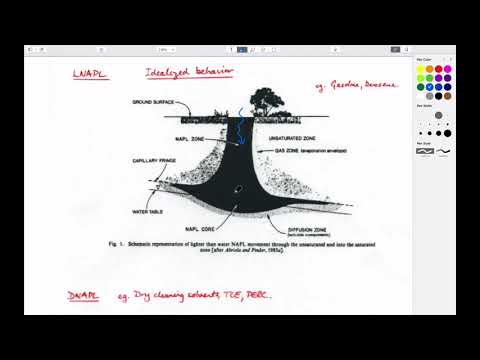

In [0]:
#@title  Introduction to Interfacial tension
#@markdown Definitions, interfacial tension, capillary behavior
from IPython.display import YouTubeVideo
YouTubeVideo('Tecnb_Z4r4o', width=600, height=400)

## Surface tesnion between gas and oil
Interfacial or surface tension exists when two phases are present. These phases can be gas/oil, oil/water, or gas/water. Interfacial tension is the force that holds the surface of a particular phase together and is normally measured in N/m. It is a function of pressure, temperature, and the composition of each phase.

https://petrowiki.org/index.php?title=Interfacial_tension&action=edit

# Models for calculation of interfacial tension 
In 1973, Ramey[3] proposed a pseudocompositional method for calculating surface tension. The two components are oil and gas. Gas is free to dissolve in the oil phase, and oil is free to vaporize in the gas phase, which makes this method more versatile than the other methods discussed in this chapter. The Weinaug-Katz equation is modified as

------ Weinaug-Katz equation -------


The surface tension of a water-hydrocarbon system varies from approximately 72 dynes/cm for water/gas systems to 20 to 40 dynes/cm for water/oil systems at atmospheric conditions. In 1973, Ramey[3] published methods to evaluate the surface tension of water-hydrocarbon mixtures. Unfortunately, this work was for liquid hydrocarbons and did not extend into the gas-phase region. A later publication by Firoozabadi and Ramey[10] provided a more generalized correlation suitable for use with gas and liquid hydrocarbons. 



----- Firoozabadi and Ramey --------


These approaches can be divided into two categories: empirical correlations and statistic thermodynamics-based methods that take into
account the density gradient between the bulk phases. For instance, here list a
few of techniques. Simple correlations methods: the parachor method and
corresponding state correlations that are not satisfactory for computing interfacial tension of compounds that exhibit strong hydrogen bonding. Statistic
thermodynamics-based methods: the perturbation theory, the density function theory and the gradient theory.



------- gradient theory---------

In [0]:
#@title Selecting interfacial tension models for gas-oil in NeqSim
#@markdown The following script calcluates the interfacial tension of methane/n-heptane using SRK in NeqSim using different methods for interfacial tension.

fluid1 = fluid('srk')
fluid1.addComponent('methane', 0.5)
fluid1.addComponent('n-heptane', 0.5)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(10.0, 'bara')
fluid1.setMixingRule('classic')
TPflash(fluid1)


method = "Parachor"
fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", "oil", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('gas', 'oil'), " N/m ", " metod: ", method)

method = "Linear Gradient Theory"
fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", "oil", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('gas', 'oil'), " N/m ", " metod: ", method)

method = "Simple Gradient Theory"
fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", "oil", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('gas', 'oil'), " N/m ", " metod: ", method)


Interfacial tension  0.019465298474219166  N/m   metod:  Parachor
Interfacial tension  0.019231442043744603  N/m   metod:  Linear Gradient Theory
Interfacial tension  0.018709698815562628  N/m   metod:  Simple Gradient Theory


In [0]:
#@title Selecting interfacial tension models for gas-water in NeqSim
#@markdown The following script calcluates the interfacial tension of methane/water using SRK in NeqSim using different methods for interfacial tension.

fluid1 = fluid('cpa')
fluid1.addComponent('methane', 0.5)
fluid1.addComponent('water', 0.5)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(10.0, 'bara')
fluid1.setMixingRule(10)
TPflash(fluid1)


method = "Parachor"
fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", "aqueous", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('gas', 'aqueous'), " N/m ", " metod: ", method)

method = "Linear Gradient Theory"
fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", "aqueous", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('gas', 'aqueous'), " N/m ", " metod: ", method)

method = "Simple Gradient Theory"
fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", "aqueous", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('gas', 'aqueous'), " N/m ", " metod: ", method)

method = "Firozabadi Ramley"
fluid1.getInterphaseProperties().setInterfacialTensionModel("gas", "aqueous", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('gas', 'aqueous'), " N/m ", " metod: ", method)

Interfacial tension  0.07162394556655427  N/m   metod:  Parachor
Interfacial tension  0.07415953853018091  N/m   metod:  Linear Gradient Theory
Interfacial tension  0.08094489498567065  N/m   metod:  Simple Gradient Theory
Interfacial tension  0.07512595363180251  N/m   metod:  Firozabadi Ramley


In [0]:
#@title Selecting interfacial tension models for oil-water in NeqSim
#@markdown The following script calcluates the interfacial tension of n-heptane/water using SRK in NeqSim using different methods for interfacial tension.

fluid1 = fluid('cpa')
fluid1.addComponent('n-heptane', 0.5)
fluid1.addComponent('water', 0.5)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(10.0, 'bara')
fluid1.setMixingRule(10)
fluid1.setMultiPhaseCheck(True)
TPflash(fluid1)


method = "Parachor"
fluid1.getInterphaseProperties().setInterfacialTensionModel("oil", "aqueous", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('oil', 'aqueous'), " N/m ", " metod: ", method)

method = "Linear Gradient Theory"
fluid1.getInterphaseProperties().setInterfacialTensionModel("oil", "aqueous", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('oil', 'aqueous'), " N/m ", " metod: ", method)

method = "Firozabadi Ramley"
fluid1.getInterphaseProperties().setInterfacialTensionModel("oil", "aqueous", method);
fluid1.initProperties()
print("Interfacial tension ", fluid1.getInterfacialTension('oil', 'aqueous'), " N/m ", " metod: ", method)

Interfacial tension  0.051043188334397686  N/m   metod:  Parachor
Interfacial tension  0.07305330229847552  N/m   metod:  Linear Gradient Theory
Interfacial tension  0.051043188334397686  N/m   metod:  Firozabadi Ramley
